## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.842253 -0.610020 -1.417960  1.629600 -0.902980  1.498744
1 -1.045978  1.008891  0.469257 -0.992910 -1.223511 -1.288120
2 -1.109845 -0.110496  1.560450 -0.851784  1.594437 -0.136050
3 -0.961745  0.088413 -0.138301  0.019323 -1.159912 -0.990829
4  0.212022 -1.236357 -0.957592  0.641774 -1.504605 -0.706066


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9826034	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.9735807	total: 69.9ms	remaining: 34.9s
2:	learn: 0.9637655	total: 70.8ms	remaining: 23.5s
3:	learn: 0.9536418	total: 71.3ms	remaining: 17.8s
4:	learn: 0.9455497	total: 71.8ms	remaining: 14.3s
5:	learn: 0.9349492	total: 72.4ms	remaining: 12s
6:	learn: 0.9264585	total: 73ms	remaining: 10.4s
7:	learn: 0.9185435	total: 73.5ms	remaining: 9.11s
8:	learn: 0.9090691	total: 74.1ms	remaining: 8.15s
9:	learn: 0.9009407	total: 74.5ms	remaining: 7.38s
10:	learn: 0.8933994	total: 75.1ms	remaining: 6.75s
11:	learn: 0.8841136	total: 75.7ms	remaining: 6.23s
12:	learn: 0.8760805	total: 76.2ms	remaining: 5.79s
13:	learn: 0.8672300	total: 76.7ms	remaining: 5.4s
14:	learn: 0.8602161	total: 77.2ms	remaining: 5.07s
15:	learn: 0.8522409	total: 77.6ms	remaining: 4.78s
16:	learn: 0.8446535	total: 78.1ms	remaining: 4.52s
17:	learn: 0.8357583	total: 78.5ms	remaining: 4.28s
18:	learn: 0.8272928	total: 79.1ms	remaining: 4.0

82:	learn: 0.4595986	total: 109ms	remaining: 1.2s
83:	learn: 0.4557572	total: 109ms	remaining: 1.19s
84:	learn: 0.4517951	total: 110ms	remaining: 1.18s
85:	learn: 0.4480318	total: 110ms	remaining: 1.17s
86:	learn: 0.4432099	total: 111ms	remaining: 1.16s
87:	learn: 0.4390268	total: 111ms	remaining: 1.15s
88:	learn: 0.4349494	total: 111ms	remaining: 1.14s
89:	learn: 0.4310008	total: 112ms	remaining: 1.13s
90:	learn: 0.4265433	total: 112ms	remaining: 1.12s
91:	learn: 0.4226596	total: 113ms	remaining: 1.11s
92:	learn: 0.4188378	total: 113ms	remaining: 1.1s
93:	learn: 0.4151525	total: 114ms	remaining: 1.09s
94:	learn: 0.4116216	total: 114ms	remaining: 1.09s
95:	learn: 0.4085545	total: 115ms	remaining: 1.08s
96:	learn: 0.4055499	total: 115ms	remaining: 1.07s
97:	learn: 0.4018759	total: 116ms	remaining: 1.06s
98:	learn: 0.3984274	total: 116ms	remaining: 1.06s
99:	learn: 0.3947793	total: 117ms	remaining: 1.05s
100:	learn: 0.3913590	total: 117ms	remaining: 1.04s
101:	learn: 0.3878730	total: 118

245:	learn: 0.1229648	total: 187ms	remaining: 574ms
246:	learn: 0.1221153	total: 188ms	remaining: 572ms
247:	learn: 0.1212229	total: 188ms	remaining: 571ms
248:	learn: 0.1203139	total: 189ms	remaining: 570ms
249:	learn: 0.1192297	total: 189ms	remaining: 568ms
250:	learn: 0.1182720	total: 190ms	remaining: 567ms
251:	learn: 0.1174522	total: 190ms	remaining: 565ms
252:	learn: 0.1165232	total: 191ms	remaining: 563ms
253:	learn: 0.1157322	total: 191ms	remaining: 561ms
254:	learn: 0.1148862	total: 192ms	remaining: 560ms
255:	learn: 0.1138854	total: 192ms	remaining: 558ms
256:	learn: 0.1129928	total: 193ms	remaining: 557ms
257:	learn: 0.1120279	total: 193ms	remaining: 555ms
258:	learn: 0.1112157	total: 193ms	remaining: 553ms
259:	learn: 0.1104132	total: 194ms	remaining: 551ms
260:	learn: 0.1094187	total: 194ms	remaining: 550ms
261:	learn: 0.1085916	total: 195ms	remaining: 548ms
262:	learn: 0.1076354	total: 195ms	remaining: 547ms
263:	learn: 0.1068055	total: 195ms	remaining: 545ms
264:	learn: 

464:	learn: 0.0347873	total: 292ms	remaining: 336ms
465:	learn: 0.0345842	total: 292ms	remaining: 335ms
466:	learn: 0.0343912	total: 293ms	remaining: 334ms
467:	learn: 0.0342128	total: 293ms	remaining: 334ms
468:	learn: 0.0341193	total: 294ms	remaining: 333ms
469:	learn: 0.0339157	total: 294ms	remaining: 332ms
470:	learn: 0.0338511	total: 295ms	remaining: 331ms
471:	learn: 0.0336541	total: 295ms	remaining: 330ms
472:	learn: 0.0335966	total: 295ms	remaining: 329ms
473:	learn: 0.0334124	total: 296ms	remaining: 328ms
474:	learn: 0.0332266	total: 296ms	remaining: 327ms
475:	learn: 0.0331648	total: 297ms	remaining: 326ms
476:	learn: 0.0329681	total: 297ms	remaining: 326ms
477:	learn: 0.0327752	total: 297ms	remaining: 325ms
478:	learn: 0.0327150	total: 298ms	remaining: 324ms
479:	learn: 0.0325035	total: 298ms	remaining: 323ms
480:	learn: 0.0322897	total: 299ms	remaining: 322ms
481:	learn: 0.0321069	total: 299ms	remaining: 321ms
482:	learn: 0.0319247	total: 300ms	remaining: 321ms
483:	learn: 

628:	learn: 0.0178460	total: 370ms	remaining: 218ms
629:	learn: 0.0177793	total: 371ms	remaining: 218ms
630:	learn: 0.0176752	total: 372ms	remaining: 217ms
631:	learn: 0.0175732	total: 372ms	remaining: 217ms
632:	learn: 0.0174733	total: 372ms	remaining: 216ms
633:	learn: 0.0174075	total: 373ms	remaining: 215ms
634:	learn: 0.0173431	total: 373ms	remaining: 215ms
635:	learn: 0.0172745	total: 374ms	remaining: 214ms
636:	learn: 0.0171609	total: 374ms	remaining: 213ms
637:	learn: 0.0170982	total: 375ms	remaining: 213ms
638:	learn: 0.0169869	total: 375ms	remaining: 212ms
639:	learn: 0.0168805	total: 376ms	remaining: 211ms
640:	learn: 0.0168054	total: 376ms	remaining: 211ms
641:	learn: 0.0167015	total: 377ms	remaining: 210ms
642:	learn: 0.0166070	total: 377ms	remaining: 209ms
643:	learn: 0.0165402	total: 378ms	remaining: 209ms
644:	learn: 0.0164224	total: 378ms	remaining: 208ms
645:	learn: 0.0163141	total: 379ms	remaining: 208ms
646:	learn: 0.0162492	total: 379ms	remaining: 207ms
647:	learn: 

843:	learn: 0.0078024	total: 476ms	remaining: 87.9ms
844:	learn: 0.0077904	total: 476ms	remaining: 87.4ms
845:	learn: 0.0077473	total: 477ms	remaining: 86.8ms
846:	learn: 0.0077410	total: 477ms	remaining: 86.2ms
847:	learn: 0.0076988	total: 478ms	remaining: 85.6ms
848:	learn: 0.0076925	total: 478ms	remaining: 85.1ms
849:	learn: 0.0076565	total: 479ms	remaining: 84.5ms
850:	learn: 0.0076175	total: 479ms	remaining: 83.9ms
851:	learn: 0.0075945	total: 479ms	remaining: 83.3ms
852:	learn: 0.0075718	total: 480ms	remaining: 82.7ms
853:	learn: 0.0075495	total: 480ms	remaining: 82.1ms
854:	learn: 0.0075237	total: 481ms	remaining: 81.5ms
855:	learn: 0.0075019	total: 481ms	remaining: 81ms
856:	learn: 0.0074780	total: 482ms	remaining: 80.4ms
857:	learn: 0.0074566	total: 482ms	remaining: 79.8ms
858:	learn: 0.0074355	total: 482ms	remaining: 79.2ms
859:	learn: 0.0074121	total: 483ms	remaining: 78.6ms
860:	learn: 0.0073914	total: 483ms	remaining: 78ms
861:	learn: 0.0073600	total: 484ms	remaining: 77.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

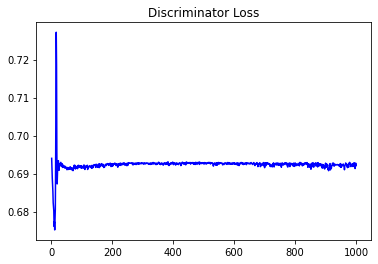

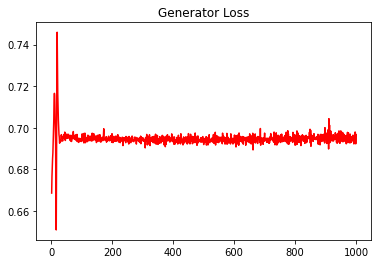

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10353520701414437


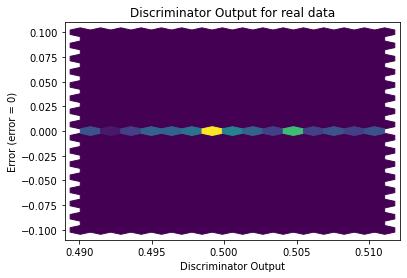

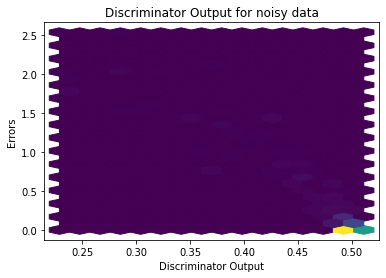

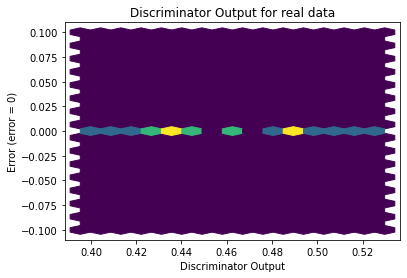

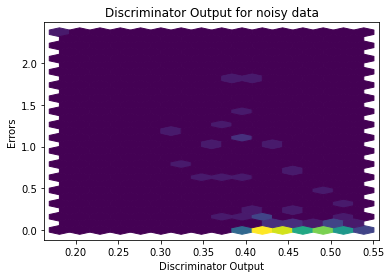

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


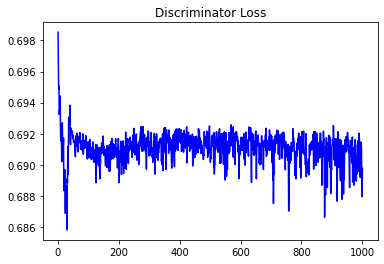

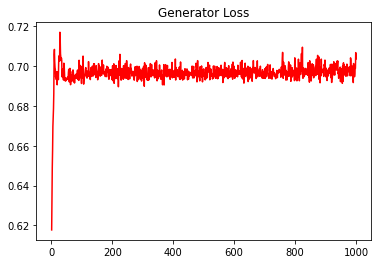

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07088869774726737


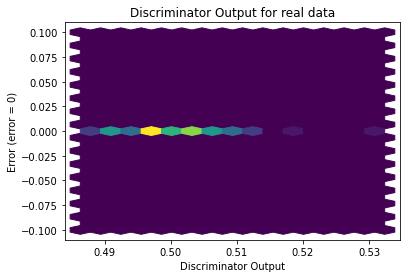

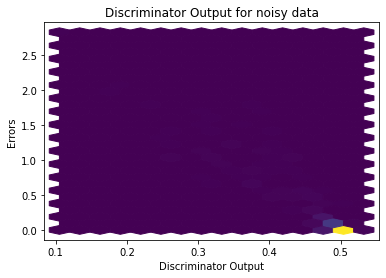

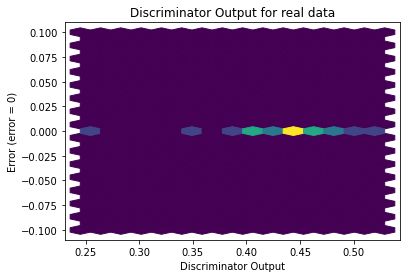

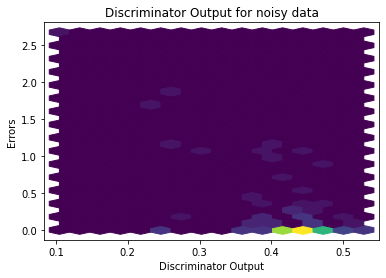

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4563]], requires_grad=True)
